In [2]:
from IPython.display import HTML

# Regresión Lineal con python

Para entender que es la regresion lineal y el uso de los algorítmos existentes en python para su implementación debemos primero preguntarnos, **¿Que es un modelo?**, existen diferentes respuestas a esta pregunta, pero en esta ocasión entenderemos un modelo como una forma simplificada de representar la realidad, también debemos entender que podemos encontrar modelos de la realidad en diferentes areas del conocimiento pero que para el caso de interes nos limitaremos a hablar y trabajar con modelos matemáticos. 


Historicamente, el concepto de regresión lineal fue planteado por el matemático fránces Legendre quien entre sus grandes contribuciones a la estadística desarrollo el método de los minimos cuadrados ("méthode des moindres carrés"), documentando el procedimiento incluso antes que su colega Gauss. [Wikipedia](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal)



## El modelo

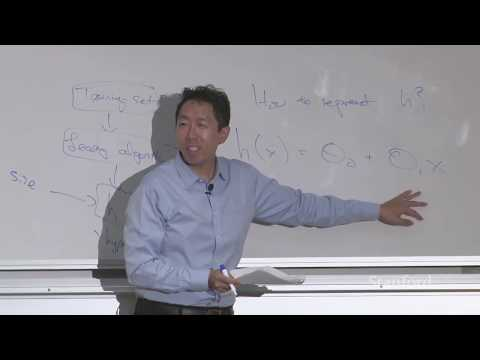

In [6]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('4b4MUYve_U8')

Considere $y_1,y2_2, \cdots, y_n$ mediciones de una característica de interes realizada en $n$ individuos, las cuales son realizaciones de $n$ [variables aleatorias](https://es.wikipedia.org/wiki/Variable_aleatoria) continuas denotadas como $Y_1, \cdots, Y_n$, y que se obtienen a través de la siguiente relación:

$$y_k = \beta_0 + \beta_1x_{k,1} + \cdots + \beta_px_{k,p} + \epsilon_{k}$$

donde $x_{k,1}, \cdots, x_{k,p}$ son valores que asumen $p$ variables explicativas, bien sean continuas o discretas, cuando son medidas en el individuo $k$, y $\beta_0, \cdots,\beta_p$ son un vector de paramétros que debe ser estimados; Por su parte $\epsilon_k$ con $k\in \{1,\cdots,n\}$ son variables aleatoria independientes e identicamente distribuidas tales que:

$$\epsilon_k \sim \mathcal{N}(0,\sigma^2)$$

Que suelen ser interpretadas como *errores aleatorios*, es decir: la observación capturada en el k-ésimo individuo puede ser interpretada como una medición *corrupta* o *distorsionada* por una fuente de *ruido* $\epsilon$. 

Matricialmente, el modelo puede expresarse como 

$$Y =X\beta + \epsilon$$

donde las columnas de $X$ son linealmente independientes, es decir, $X$ tiene rango igual a $p$. El modelo recibe el nombre de lineal debido a que la combinación de las $X's$ antes descritas resulta ser lineal en los parámetros, es decir, se puede escribir como una combinación lineal de los $\beta's$. Por otra parte, recibe este nombre debido a que la fuente de *ruido* resulta seguir una [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal).

## Implementación

Para la implementación de este modelo usaremos los datos disponibles en la colección [Vega Data-sets](https://github.com/vega/vega-datasets) 

In [1]:
from vega_datasets import data

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
cars = pd.DataFrame(data('cars'))

In [4]:
cars= cars.dropna()

Realizaremos un modelo de regresión lineal simple con dos caracteristicas **Displacement** y **Horsepower**, usando **Miles_per_Gallon** como varaible de respuesta.  

In [5]:
y  = pd.Series.to_numpy(cars['Miles_per_Gallon'])
X = cars[['Displacement','Horsepower']]

# para sklearn las varibales deben ser arreglos 2-dimensionales
y = y.reshape(-1, 1)

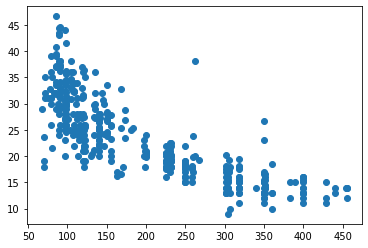

In [70]:
plt.scatter(cars['Displacement'],y)

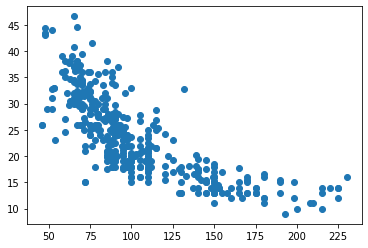

In [71]:
plt.scatter(cars['Horsepower'],y)

se usara el paquete **statsmodels**, el cuál es un paquete que proporciona diferente funciones para la estimación de modelos estadísticos.

Para la estimación del modelo sin intercepto se tiene: 

In [79]:
lm=sm.OLS(y,X).fit()
pred = lm.predict(X)

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.739
Model:                            OLS   Adj. R-squared (uncentered):              0.738
Method:                 Least Squares   F-statistic:                              551.8
Date:                Sat, 13 Mar 2021   Prob (F-statistic):                   1.91e-114
Time:                        11:58:33   Log-Likelihood:                         -1550.2
No. Observations:                 392   AIC:                                      3104.
Df Residuals:                     390   BIC:                                      3112.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Displacement    -0.1461      0.013    -11.573      0.000      -0.171      -0.121
Horsepower       0.4608      0.025     18.409      0.000       0.412       0.510
==============================================================================
Omnibus:                       17.738   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.418
Skew:                          -0.424   Prob(JB):                     2.23e-05
Kurtosis:                       3.771   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Si queremos añadir el intercepto, debemos hacerlo desde la matriz de diseño:

In [6]:
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     384.9
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           6.17e-93
Time:                        12:04:45   Log-Likelihood:                -1147.2
No. Observations:                 392   AIC:                             2300.
Df Residuals:                     389   BIC:                             2312.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           37.4695      0.728     51.489      0.000      36.039      38.900
Displacement    -0.0408      0.005     -8.225      0.000      -0.051      -0.031
Horsepower      -0.0583      0.013     -4.319      0.000      -0.085      -0.032
==============================================================================
Omnibus:                       36.284   Durbin-Watson:                   0.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.828
Skew:                           0.736   Prob(JB):                     1.84e-10
Kurtosis:                       3.760   Cond. No.                         782.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""